<a href="https://colab.research.google.com/github/mokoron/productstar/blob/main/%D0%A4%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем необходимые для работы библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт и анализ данных

датасет можно скачать по ссылке: https://github.com/mokoron/productstar/blob/main/StressLevelDataset.csv

In [2]:


df = pd.read_csv("StressLevelDataset.csv")

In [3]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Датасет "Уровень стресса у студентов" содержит 21 наблюдаемую переменную, тщательно отобранные для отражения наиболее влияющих факторов на стресс учащегося. Исследователи разделили характеристики на пять основных факторов: психологические, физиологические, социальный, экологические и академические. Они направлены на обеспечение всестороннего понимания различных элементов, способствующих студенческому стрессу. Давайте проанализируем датасет и проверим, как факторный анализ и метод главных компонент объединят исходные наблюдения, совпадут ли полученные факторы с теми, которые задумали исследователи.


У нас 21 переменная. Значит нам надо не менее 42 опрошенных студентов или не менее 42 наблюдений. А лучше – еще больше.

In [5]:
total_student = len(df)
print(f"В датасете = {total_student} опрощенных студентов")

В датасете = 1100 опрощенных студентов


In [6]:
#проверим, есть ли у нас пропущенные значения
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

df.describe() – это метод библиотеки pandas, который предоставляет основные статистические характеристики для каждого числового столбца в DataFrame

1. count: Количество непропущенных значений.
1. mean: Среднее значение.
2. std: Стандартное отклонение.
3. min: Минимальное значение.
4. 25%: 25-й процентиль (нижний квартиль).
5. 50%: Медиана (50-й процентиль).
6. 75%: 75-й процентиль (верхний квартиль).
7. max: Максимальное значение.

Эти статистические характеристики помогают понять распределение данных в каждом столбце и выявить основные характеристики, такие как среднее, медиана, дисперсия и диапазон значений.

In [7]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


# Вычисление корреляционной матрицы

Исследование факторного анализа мы начинаем с вычисления корреляционной матрицы

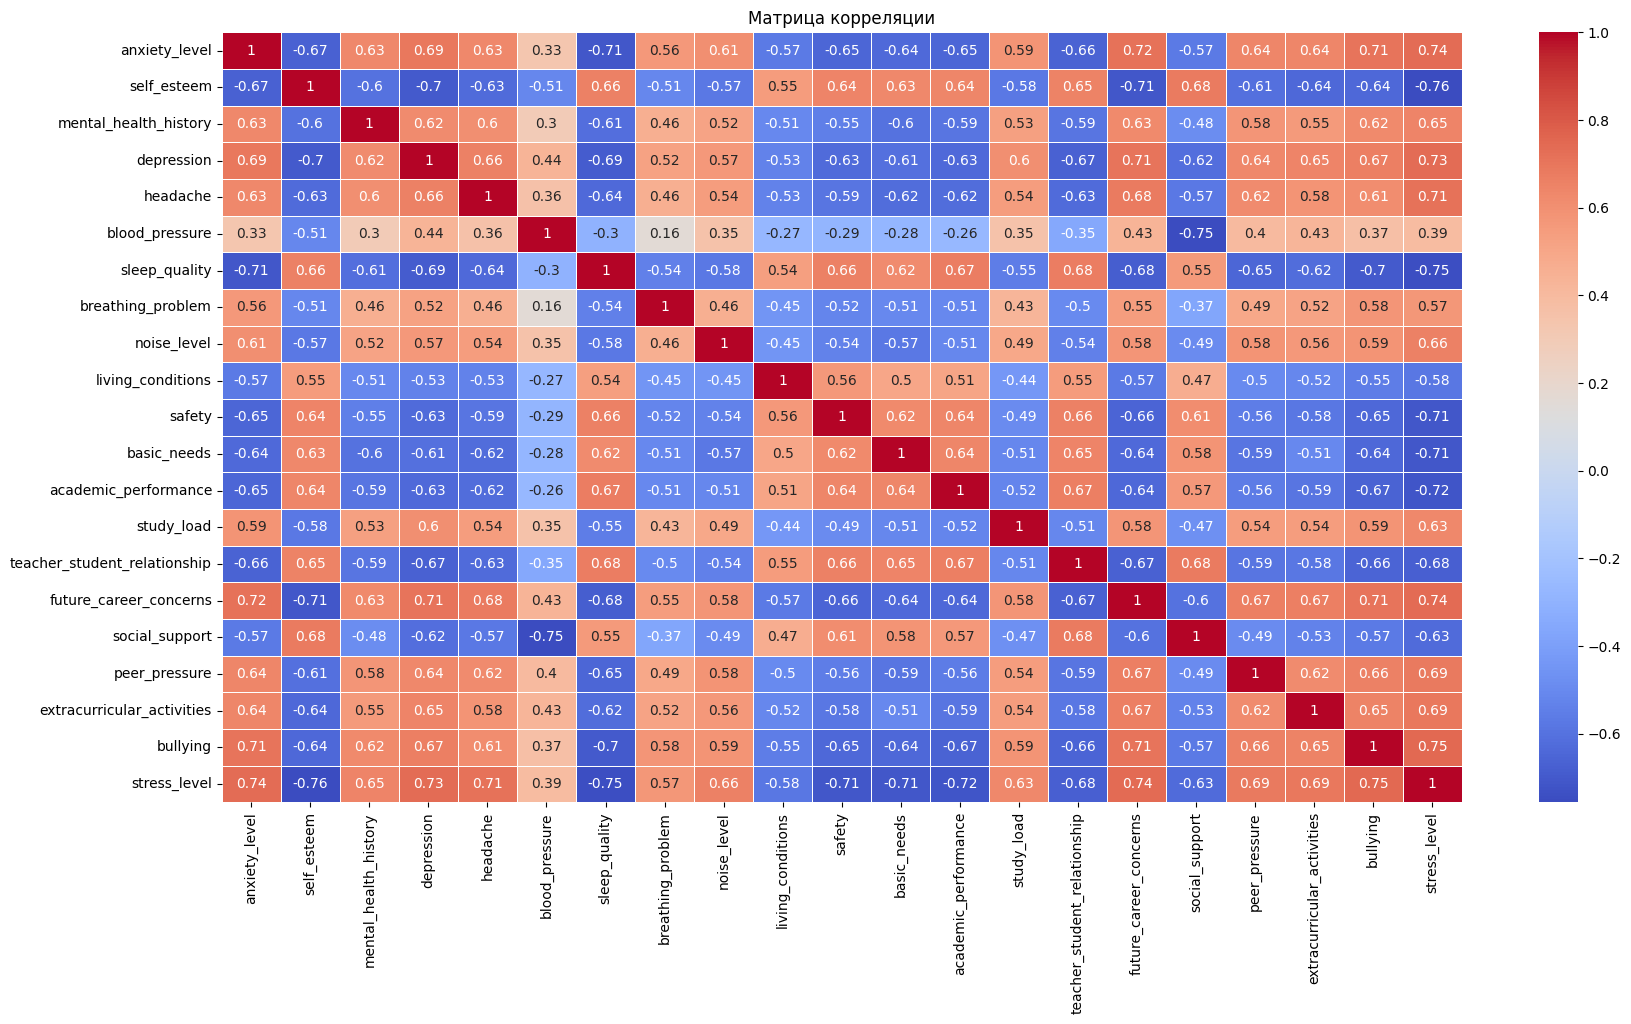

In [10]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()

## Вычисляем собственные числа матрицы корреляций

In [11]:
# Находим собственные числа
eigenvalues, _ = np.linalg.eig(correlation_matrix)

# Выводим результат
print("Собственные числа:", eigenvalues)

Собственные числа: [12.70294466  1.19861812  0.69394774  0.10226818  0.59529366  0.55921525
  0.17489164  0.5262102   0.47423875  0.45801512  0.23296411  0.4063027
  0.26646354  0.27322623  0.28248605  0.38595835  0.36433672  0.34838292
  0.3287309   0.31322604  0.31227913]


Вспоминаем критерии выбора/отсеивания факторов. Критерий Кайзера – число факторов равно числу линейных комбинаций, собственные значения которых больше 1.

Давайте построима график каменистой осыпи и посмотрим точку перегиба

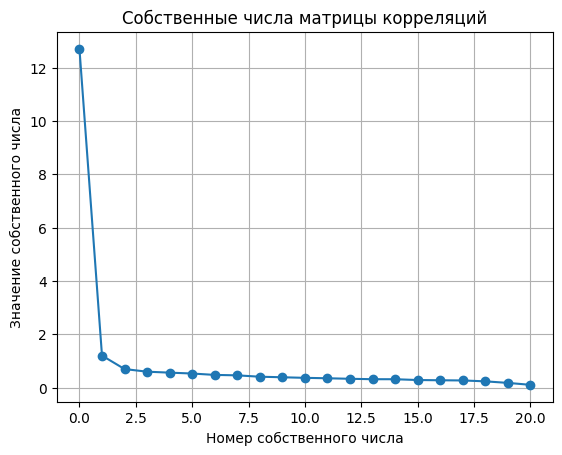

In [12]:
import matplotlib.pyplot as plt
# Сортируем собственные числа в убывающем порядке
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Построение графика
plt.plot(eigenvalues_sorted, marker='o')
plt.title('Собственные числа матрицы корреляций')
plt.xlabel('Номер собственного числа')
plt.ylabel('Значение собственного числа')
plt.grid(True)
plt.show()

# Метод главных компонент (реализация "в ручную")

Давайте вспомним, математический смысл метода главных компонет:

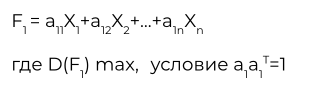


In [14]:
def manual_pca(data, num_components):
    """
    Функция вычисления факторных нагрузок.

    Параметры:
    - data: матрица исходных данных.
    - num_components: число факторов.
    """

    #  Шаг 1: Центрирование данных. Центрирование помогает убрать влияние среднего значения признаков
    # и фокусироваться на их изменчивости. Центрирование облегчает интерпретацию компонент главных осей,
    # так теперь это вариации относительно среднего значения, а не абсолютные значения признаков.
    # Уменьшение корреляции: Центрирование данных помогает уменьшить корреляцию между признаками,
    # это положительно влияет на стабильность метода PCA. Хотя мы могли бы обойтись и без центрирования

    mean_vector = np.mean(data, axis=0)
    centered_data = data - mean_vector

    # Шаг 2: Вычисление ковариационной матрицы. Вообще мы могли бы использовать матрицу корреляций,
    # но класс PCA из библиотеки sklearn использует матрицу ковариаций, а мы хотим сравнить результаты двух вычислений

    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Шаг 3: Вычисление собственных значений и собственных векторов
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Шаг 4: Сортировка собственных значений и векторов в убывающем порядке
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Шаг 5: Выбор определенного числа главных компонент
    selected_eigenvectors = eigenvectors[:, :num_components]

    return selected_eigenvectors

In [13]:
def interpret_factors(factor_loadings, variable_names):
    """
    Функция для интерпретации факторных нагрузок.

    Параметры:
    - factor_loadings: Матрица факторных нагрузок размерности (количество переменных, количество факторов).
    - variable_names: Список имен переменных, соответствующих строкам в матрице factor_loadings.
    """
    num_factors = factor_loadings.shape[1]

    # Проходим по каждому фактору
    for i in range(num_factors):
        print(f"Фактор {i+1}:")

        # Выводим факторные нагрузки для каждой переменной
        for j in range(factor_loadings.shape[0]):
            print(f"  {variable_names[j]}: {factor_loadings[j, i]}")
        print()

In [15]:
# Задаем число факторов
num_factors = 2

# Применяем фунцию факторного анализа
factor_loadings = manual_pca(df, num_factors)

# Выводим факторные нагрузки, полученные в результате
print("Факторные нагрузки:")
print(factor_loadings)

Факторные нагрузки:
[[ 0.40752691 -0.26619209]
 [-0.6587742  -0.72531153]
 [ 0.02769293 -0.00862385]
 [ 0.54765907 -0.62747258]
 [ 0.08155379 -0.02931877]
 [ 0.03344338  0.0217635 ]
 [-0.0956977   0.03838293]
 [ 0.06682973 -0.02543169]
 [ 0.06954292 -0.01796781]
 [-0.05550396  0.00855119]
 [-0.08156888  0.01287518]
 [-0.08140027  0.01143555]
 [-0.08207565  0.0177412 ]
 [ 0.06964371 -0.02464206]
 [-0.0830388   0.02597652]
 [ 0.09830419 -0.0195791 ]
 [-0.05993027 -0.01250494]
 [ 0.08077111 -0.03205772]
 [ 0.08250638 -0.02039179]
 [ 0.09236448 -0.03873304]
 [ 0.05523543 -0.00653635]]


## Интерпретация факторов

In [16]:
# Напишем функцию, которая будет использоваться для выделения наибольших значений в столбцах.
# Функция принимает столбец данных (s) и возвращает стиль для каждого элемента столбца.

def highlight_max(s):
    # Получаем 10 наибольших значений в столбце
    is_large = s.nlargest(10).values
    # Применяем стиль, если текущее значение среди 10 наибольших
    return ['background-color: palevioletred' if v in is_large else '' for v in s]


In [17]:
# Сортируем фактрные нагрузки (loadings) по убыванию для первого фактора (или другого выбранного фактора)
# и применяем стиль

fa_load_pca = pd.DataFrame(factor_loadings,index=df.columns)
fa_load_pca.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1
depression,0.547659,-0.627473
anxiety_level,0.407527,-0.266192
future_career_concerns,0.098304,-0.019579
bullying,0.092364,-0.038733
extracurricular_activities,0.082506,-0.020392
headache,0.081554,-0.029319
peer_pressure,0.080771,-0.032058
study_load,0.069644,-0.024642
noise_level,0.069543,-0.017968
breathing_problem,0.066830,-0.025432


# sklearn PCA
Давайте теперь попробуем повторить этот результат с помощью библиотек.

In [18]:
from sklearn.decomposition import PCA

In [19]:
# Создаем объект PCA с указанием количества компонент (в данном случае, 2)
pca = PCA(n_components=2)

pca.fit_transform(df) # Применяем PCA к данным и получаем преобразованные компоненты
eigenvectors = pca.components_ # Получаем собственные векторы (главные компоненты)
ps = pd.DataFrame(eigenvectors.T, index=df.columns)

ps.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1
depression,0.547659,-0.627473
anxiety_level,0.407527,-0.266192
future_career_concerns,0.098304,-0.019579
bullying,0.092364,-0.038733
extracurricular_activities,0.082506,-0.020392
headache,0.081554,-0.029319
peer_pressure,0.080771,-0.032058
study_load,0.069644,-0.024642
noise_level,0.069543,-0.017968
breathing_problem,0.066830,-0.025432


Отлично! Мы реализовали метод главных компонент в ручную и с помощью бибилиотеки sklearn

Прежде, чем двинуться дальше, давайте посмотрим, какую еще информацию мы можем извлечь. Например,
explained_variance_ratio_ и explained_variance_ в scikit-learn возвращают одномерные массивы, представляющие дисперсию, объясненную каждой главной компонентой.

In [20]:
# Получаем дисперсию вклада собственных значений в факторы
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.76034735 0.10237162]


Получается, что двумя факторами мы можем описать 86% исходной информации

Таким образом, выбор между вручную реализованным PCA и использованием библиотеки scikit-learn зависит от ваших целей и предпочтений. Если вам нужен контроль и вы хотите глубже понять метод – можно реализовать метод вручную. Если вам нужно быстро применить PCA к данным в рамках более крупного проекта или рабочего проекта, использование scikit-learn может быть более предпочтительным.

# Факторный анализ

Давайте перейдем непосредственно к факторному анализу, для этого установим бибилиотеку, которой будем пользоваться

In [21]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 42.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=ae0b6a04fcd9508218cd842070e55851443ce0de4de1866340aac3afb326b59a
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [22]:
from factor_analyzer import FactorAnalyzer

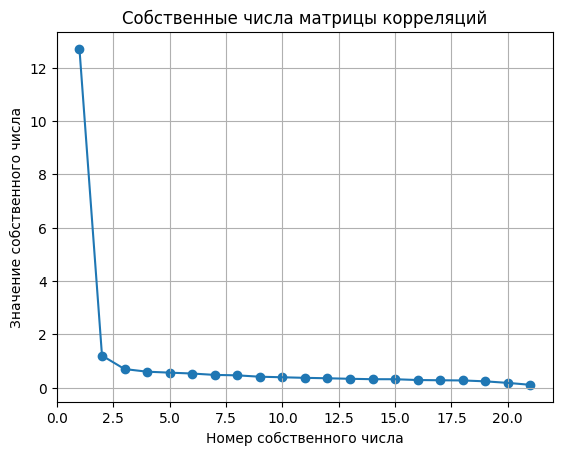

In [23]:
n = df.shape[1] # n - количество переменных (столбцов) в нашем наборе данных

fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=n)  # Создаем экземпляр класса факторного анализа
# rotation=None: не используем вращение факторов (оставляем факторы в изначальных осях)
# impute="drop": удаляем строки с отсутствующими значениями перед проведением анализа
# n_factors=n: указываем количество факторов равное количеству переменных

# Обучаем модель факторного анализа на данных
fa.fit(df)

ev,_ = fa.get_eigenvalues() # Получаем собственные значения для каждого фактора

# Создаем график каменистой осыпи (Scree plot)
plt.scatter(range(1,n+1),ev)

plt.plot(range(1,n+1),ev)
plt.title('Собственные числа матрицы корреляций')
plt.xlabel('Номер собственного числа')
plt.ylabel('Значение собственного числа')
plt.grid()

In [24]:
print (ev)

# Правда же похоже на то, что мы уже делали с помощью библтотеки numpy?

[12.70294466  1.19861812  0.69394774  0.59529366  0.55921525  0.5262102
  0.47423875  0.45801512  0.4063027   0.38595835  0.36433672  0.34838292
  0.3287309   0.31322604  0.31227913  0.28248605  0.27322623  0.26646354
  0.23296411  0.17489164  0.10226818]


## Факторная нагрузка

Факторная нагрузка может рассказать нам, как каждый  фактор объясняет каждую переменную. Большее значение говорит о том, что этот фактор хорошо объясняет эту переменную.

In [25]:
# Создаем экземпляр класса факторного анализа с указанием количества факторов (2) и метода вращения 'varimax'
fa = FactorAnalyzer(n_factors=2,rotation='varimax')

fa.fit(df)
fa_load = pd.DataFrame(fa.loadings_,index=df.columns)

In [26]:
# Сортируем факторные нагрузки (loadings) по убыванию для первого фактора (или другого выбранного фактора)
# и применяем стиль функции highlight_max(s), которую мы написали ранее

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1
stress_level,0.848777,0.294885
anxiety_level,0.808838,0.231195
bullying,0.794379,0.253333
future_career_concerns,0.777342,0.333321
depression,0.750879,0.349727
headache,0.726029,0.283457
mental_health_history,0.715970,0.203001
peer_pressure,0.712996,0.282217
extracurricular_activities,0.694308,0.321868
breathing_problem,0.660060,0.073260


In [ ]:
# метод fa.get_factor_variance() возвращает информацию о дисперсии факторов.
# Результатом является массив, содержащий три значения: общая дисперсия (Variance),
# пропорциональная дисперсия (Proportional Var) и кумулятивная дисперсия (Cumulative Var).

print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0         1
Variance          10.574049  2.842897
Proportional Var   0.503526  0.135376
Cumulative Var     0.503526  0.638902


Смотрим куммулятивную дисперсию и видим, что первый фактор может объяснит 50,35% исходной информации. А первые два фактора - почти 64% информации.